In [1]:
pip install sonar

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dodlaraj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install hatesonar

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dodlaraj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pickle

from hatesonar import Sonar 


import warnings
warnings.filterwarnings('ignore')

In [4]:
# tweets about electric cars
df = pd.read_pickle('./sentiment_analysis_vader_results.pkl')
df = df[['text', 'negative', 'neutral', 'positive', 'compound', 'sentiment']]

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.shape

(91311, 6)

In [7]:
df.head()


,text,negative,neutral,positive,compound,sentiment
0,RT @iot_automotive: 24h round-up. A collection...,0.0,0.624,0.376,0.7206,1
1,Meet Powderworld: A Lightweight Simulation Env...,0.0,1.000,0.000,0.0000,0
2,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,0.0,0.847,0.153,0.4404,1
3,RT @lidarnews: This research paper investigate...,0.0,0.828,0.172,0.4404,1
4,RT @guidaautonoma: American drivers are more l...,0.0,0.850,0.150,0.4588,1


In [8]:
df.describe()

,negative,neutral,positive,compound,sentiment
count,91311.000000,91311.000000,91311.000000,91311.000000,91311.000000
mean,0.030939,0.869843,0.099216,0.161434,0.316764
std,0.073235,0.135761,0.122643,0.345008,0.695496
min,0.000000,0.134000,0.000000,-0.979000,-1.000000
25%,0.000000,0.781000,0.000000,0.000000,0.000000
50%,0.000000,0.881000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.173000,0.421500,1.000000
max,0.744000,1.000000,0.866000,0.979200,1.000000


In [9]:
type(df['text'][1])

str

### Function to classify Tweets

In [10]:
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [11]:
Class = []
hate = []
offensive = []
neither = []

In [12]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['text']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [13]:
# Function calling 
hate_speech_classifier(df, Class, hate, offensive, neither)

In [14]:
# Prepare columns to add the scores later
df["Class"] = Class
df["hate"] = hate
df["offensive"] = offensive
df["neither"] = neither

In [15]:
df.Class.value_counts()

neither               90416
offensive_language      870
hate_speech              25
Name: Class, dtype: int64

In [16]:
467/(df.Class.value_counts()[-1] + df.Class.value_counts()[1])

0.5217877094972067

### Number of Tweets by Hate Speech Classification

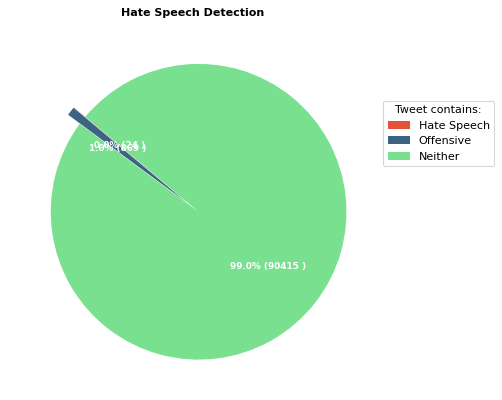

In [17]:
# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.Class.value_counts()[-1], df.Class.value_counts()[1], df.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Tweet contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=8, weight=700)
ax.set_title("Hate Speech Detection", fontsize=10, fontweight="bold")
plt.show()

### Histogram

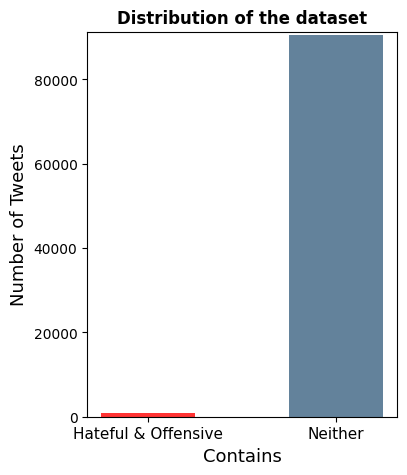

In [18]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df.Class.value_counts()[-1] + df.Class.value_counts()[1], df.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12, fontweight="bold")
plt.ylim(0, len(df['text']))
plt.show()

In [19]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df.Class.value_counts()[-1], df.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

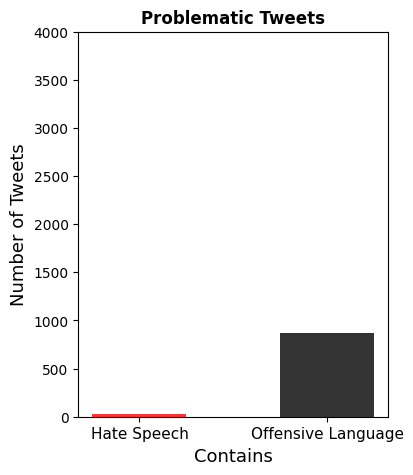

In [20]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic Tweets", fontsize=12, fontweight="bold")
plt.ylim(0, 4000)
plt.show()

###  Seperate the dataset accordingly to contining hateful speech, offensive language and neither

In [21]:
df_hate = df[df['Class']=='hate_speech']
df_offensive = df[df['Class']=='offensive_language']
df_neither = df[df['Class']=='neither']

In [22]:
df_neither.sentiment.value_counts()

 1    40782
 0    37757
-1    11877
Name: sentiment, dtype: int64

In [23]:
df_offensive.sentiment.value_counts()

 1    338
-1    324
 0    208
Name: sentiment, dtype: int64

### no hate speech found, analyzed offensive and neutral tweets

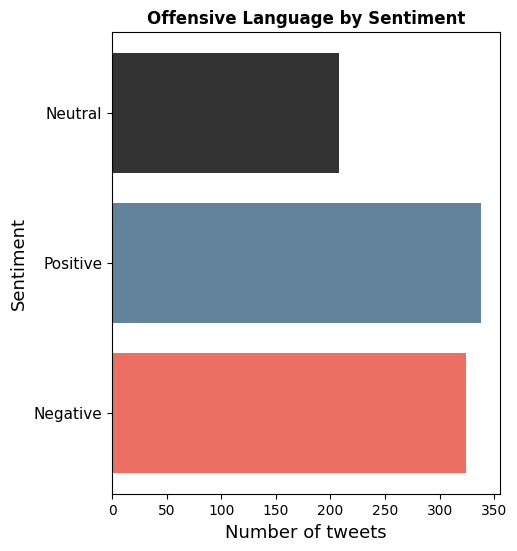

In [24]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_offensive.sentiment.value_counts()[-1], df_offensive.sentiment.value_counts()[1], df_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Tweets classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12, fontweight="bold")
plt.show()

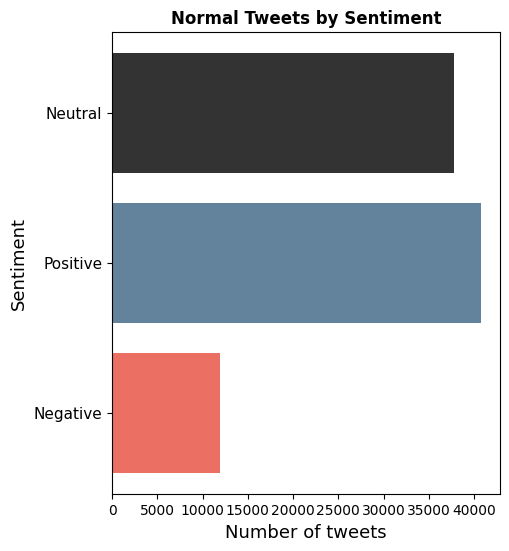

In [25]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_neither.sentiment.value_counts()[-1], df_neither.sentiment.value_counts()[1], df_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Tweets classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

### Scatter Plot of Hate Score

<Figure size 2000x500 with 0 Axes>

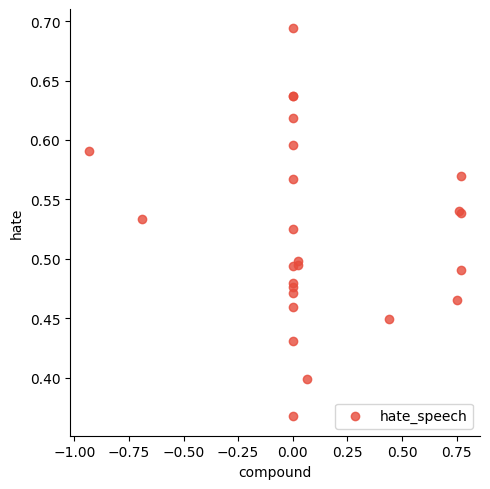

In [26]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

### Top 10 Hateful Tweets

In [27]:
df_hate.sort_values('hate', inplace=True, ascending=False)

In [28]:
df_hate.reset_index(drop=True, inplace=True)

In [29]:
df_offensive.sort_values('offensive',inplace=True, ascending=False)

In [30]:
df_offensive.reset_index(drop=True, inplace=True)

In [31]:
df_offensive.head(10)

,text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,RT @YourMansCriib: Side hoes become psycho hoe...,0.000,1.000,0.000,0.0000,0,offensive_language,0.003615,0.996384,1.124995e-06
1,@R3sid3nt3vil4 @MAGAGEM1 @elonmusk @Liz_Wheele...,0.219,0.562,0.219,0.0000,0,offensive_language,0.012026,0.987852,1.227049e-04
2,Gonna be a bitch to charge your #ElectricVeh...,0.226,0.774,0.000,-0.5859,-1,offensive_language,0.024357,0.974537,1.105690e-03
3,"@Lazy___boi @shofu Fuck it needs 252 ""EVs""? Th...",0.360,0.640,0.000,-0.8074,-1,offensive_language,0.025961,0.973970,6.910351e-05
4,@seekup717 @TeslaCharging I could careless who...,0.114,0.773,0.114,0.0000,0,offensive_language,0.025257,0.969241,5.502069e-03
5,@evs_entropy @avetheidiot is that a tauros nam...,0.000,0.828,0.172,0.3612,1,offensive_language,0.026925,0.968467,4.608042e-03
6,FUCK MICHIGAN BITCH ASS SCHOOL DOWN THE ROAD #...,0.684,0.316,0.000,-0.9325,-1,offensive_language,0.034016,0.965983,1.582033e-08
7,RT @RubiRose: I’m only drinking if we getting ...,0.206,0.657,0.137,-0.3561,-1,offensive_language,0.029361,0.964236,6.402888e-03
8,@rawsalerts Well shit. How can they charge the...,0.308,0.513,0.179,-0.3612,-1,offensive_language,0.046335,0.949759,3.905970e-03
9,RT @olsen_jerry: Holy shit. EV owners read thi...,0.340,0.660,0.000,-0.5574,-1,offensive_language,0.043711,0.948034,8.255028e-03


### Trying on Specific Tweets

In [32]:
list(sonar.ping(text=df['text'].iloc[189]).values())

['RT @guidaautonoma: #AutonomousVehicles of the Week \n1️⃣ year ago:\nNovember 22-November 28,2021🚗🚚🚌🚕\n\n@AkwyZ @GlenGilmore \n@FishEyeBoxIndia @…',
 'neither',
 [{'class_name': 'hate_speech', 'confidence': 0.036647324049030316},
  {'class_name': 'offensive_language', 'confidence': 0.3415289659708846},
  {'class_name': 'neither', 'confidence': 0.621823709980085}]]

In [33]:
sonar.ping(text="At least I'm not beautiful")

{'text': "At least I'm not beautiful",
 'top_class': 'neither',
 'classes': [{'class_name': 'hate_speech', 'confidence': 0.03721542824393398},
  {'class_name': 'offensive_language', 'confidence': 0.36149194189180184},
  {'class_name': 'neither', 'confidence': 0.6012926298642641}]}

### Saving Results

In [34]:
df.drop(['negative', 'neutral', 'positive', 'compound', 'sentiment'],axis=1, inplace=True)
df.to_pickle('./hate_speech_results.pkl')